In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)






data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")
data_train = data_train.sample(frac=1).reset_index(drop=True)

data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [3]:
# label_encoder = LabelEncoder()
# data_train['label'] = label_encoder.fit_transform(data_train['label'])
# data_test['label']=label_encoder.transform(data_test['label'])
# data_val['label']=label_encoder.transform(data_val['label'])





In [4]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,fake,-365.586945,47.748894,-24.994429,-9.688383,-20.495600,-12.765313,-16.287811,-3.157413,-12.345013,...,-3.909991,-2.383344,0.592238,1.149818,3.204568,3.777385,5.916702,7.223622,10.626857,11.745197
1,fake,-331.794159,61.470425,-30.805861,-21.231075,-33.212151,-36.253078,-23.248423,-14.045774,-13.796109,...,1.479279,-1.775501,-4.147758,-7.962297,-9.703223,-11.806010,-11.561783,-11.860989,-9.271895,-6.842391
2,fake,-296.568573,43.066353,-11.780764,-6.334638,-42.126701,-38.527393,-20.795422,-10.713686,-7.623130,...,1.292750,-0.848831,-3.938276,-7.491464,-9.788463,-11.673387,-11.793200,-11.273815,-9.735508,-7.311472
3,fake,-314.073212,67.776428,-23.107109,-14.983891,-27.448462,-40.564960,-17.400192,-13.025271,-19.990774,...,2.319074,-0.630923,-2.799259,-7.679436,-8.277776,-10.789138,-11.627978,-12.742414,-9.947080,-7.933082
4,fake,-321.660797,44.345638,-11.605806,-7.501880,-33.129490,-39.541149,-21.991903,-9.166224,-17.356697,...,1.708512,-1.748569,-3.145730,-7.236038,-8.968603,-11.719190,-11.629709,-11.512665,-9.027539,-6.616038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-350.009796,40.192329,-12.848971,-8.474126,-15.149922,-11.253163,-23.151056,-3.808032,-14.012766,...,-4.164503,-2.619974,0.508770,0.721676,3.009087,3.333721,6.047343,7.224060,10.345551,11.753277
117889,real,-305.337341,48.417084,-19.931454,-15.351363,-25.090637,-26.470440,-29.193663,-21.143871,-17.683971,...,1.367128,-0.273671,-1.855057,-6.271153,-7.637580,-9.285505,-9.967447,-10.236562,-8.813279,-7.520020
117890,fake,-314.718994,35.121891,-20.354921,-18.895149,-30.641518,-36.526112,-32.223461,-1.735525,-10.519713,...,1.973258,-0.557447,-1.662594,-4.954842,-6.247040,-8.468987,-9.360468,-9.996994,-8.317960,-6.735479
117891,fake,-319.657532,57.321621,-14.487861,-12.512058,-36.386818,-45.982830,-23.207550,-15.120266,-18.785652,...,2.030661,-1.278360,-3.826934,-7.777655,-10.165265,-12.365358,-12.139321,-12.073228,-9.840010,-7.766447


In [5]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [6]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels
y_train = pd.get_dummies(y_train)

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels
y_val = pd.get_dummies(y_val)



X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels
y_test = pd.get_dummies(y_test)


In [7]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
1843/1843 [==============================] - 16s 8ms/step - loss: 0.2944 - accuracy: 0.9107 - val_loss: 0.3128 - val_accuracy: 0.9111
Epoch 2/100
1843/1843 [==============================] - 14s 8ms/step - loss: 0.2921 - accuracy: 0.9111 - val_loss: 0.2913 - val_accuracy: 0.9111
Epoch 3/100
1843/1843 [==============================] - 14s 8ms/step - loss: 0.2901 - accuracy: 0.9111 - val_loss: 0.2799 - val_accuracy: 0.9111
Epoch 4/100
1843/1843 [==============================] - 14s 8ms/step - loss: 0.2638 - accuracy: 0.9117 - val_loss: 0.2342 - val_accuracy: 0.9161
Epoch 5/100
1843/1843 [==============================] - 14s 7ms/step - loss: 0.1903 - accuracy: 0.9325 - val_loss: 0.1575 - val_accuracy: 0.9431
Epoch 6/100
1843/1843 [==============================] - 14s 8ms/step - loss: 0.1403 - accuracy: 0.9491 - val_loss: 0.1184 - val_accuracy: 0.9554
Epoch 7/100
1843/1843 [==============================] - 14s 7ms/step - loss: 0.1107 - accuracy: 0.9595 - val_loss: 0.0917 -

In [8]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.0556 - accuracy: 0.9866 - 1s/epoch - 3ms/step
Test Accuracy: 98.66%


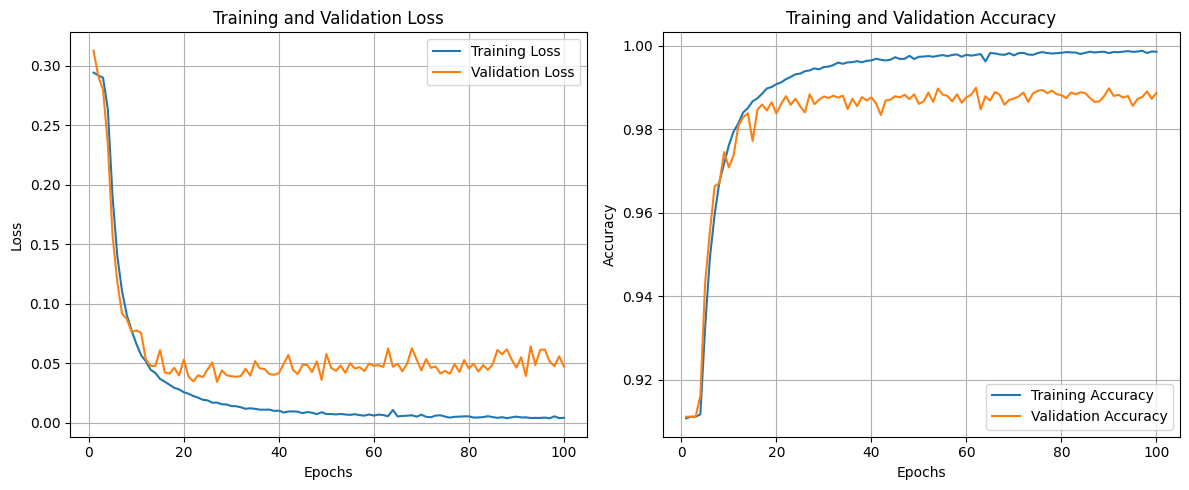

In [9]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 2ms/step
Test f1_score : 92.48%


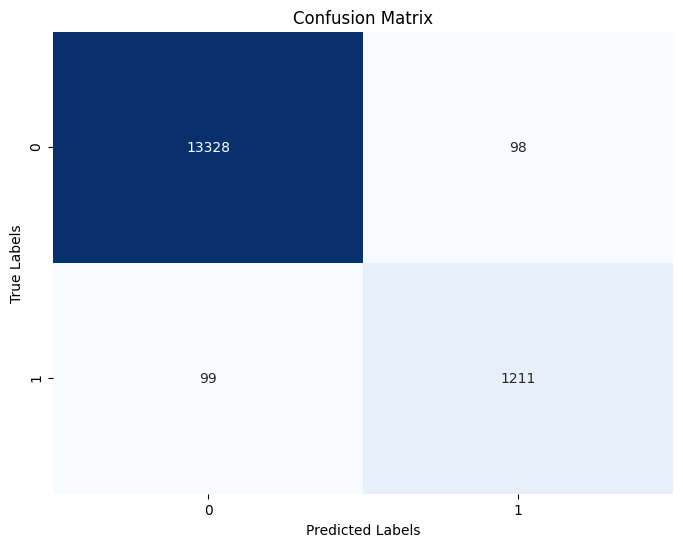

In [10]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test),axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test),axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


# eraly stopping

In [13]:
import tensorflow as tf
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])



Epoch 1/100
1843/1843 [==============================] - 15s 7ms/step - loss: 0.2866 - accuracy: 0.9106 - val_loss: 0.2747 - val_accuracy: 0.9111
Epoch 2/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.2716 - accuracy: 0.9111 - val_loss: 0.2740 - val_accuracy: 0.9111
Epoch 3/100
1843/1843 [==============================] - 13s 7ms/step - loss: 0.2659 - accuracy: 0.9113 - val_loss: 0.2619 - val_accuracy: 0.9112
Epoch 4/100
1843/1843 [==============================] - 13s 7ms/step - loss: 0.2611 - accuracy: 0.9116 - val_loss: 0.2400 - val_accuracy: 0.9161
Epoch 5/100
1843/1843 [==============================] - 13s 7ms/step - loss: 0.2243 - accuracy: 0.9189 - val_loss: 0.1898 - val_accuracy: 0.9266
Epoch 6/100
1843/1843 [==============================] - 13s 7ms/step - loss: 0.1629 - accuracy: 0.9399 - val_loss: 0.1792 - val_accuracy: 0.9427
Epoch 7/100
1843/1843 [==============================] - 13s 7ms/step - loss: 0.1243 - accuracy: 0.9545 - val_loss: 0.1130 -

In [14]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.0566 - accuracy: 0.9889 - 2s/epoch - 4ms/step
Test Accuracy: 98.89%


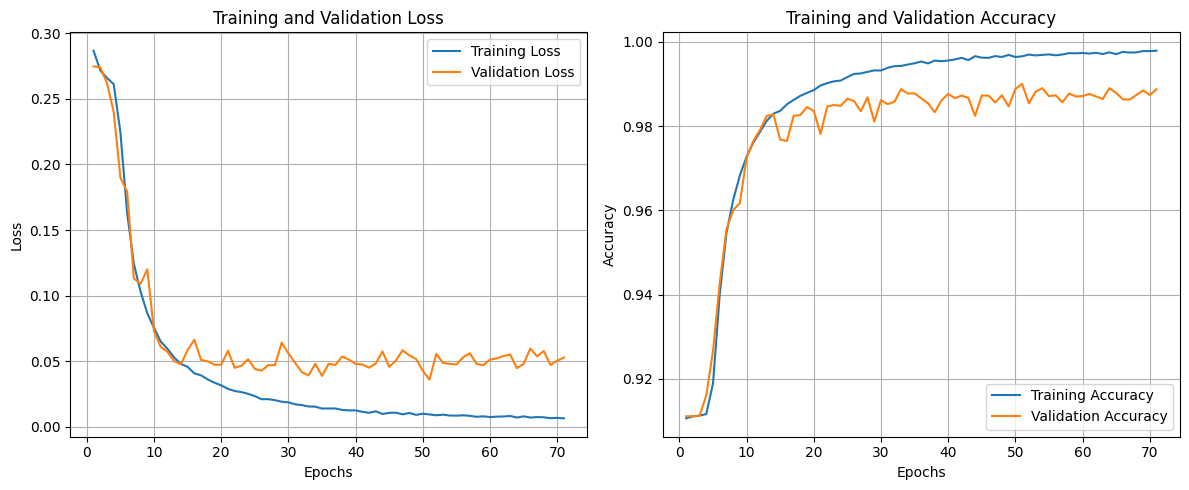

In [15]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




461/461 [==============================] - 1s 2ms/step
Test f1_score : 93.60%


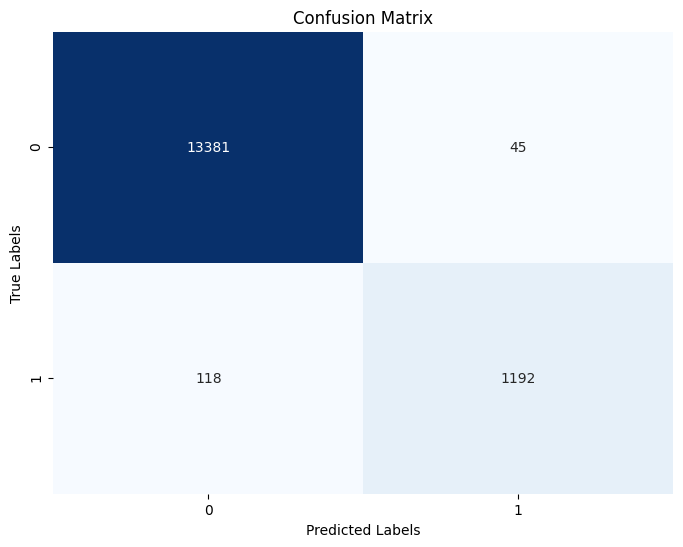

In [16]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
